In [ ]:
# Import library yang diperlukan
import pandas as pd # untuk manipulasi dan analisis data, terutama dengan DataFrame.

import matplotlib.pyplot as plt # membuat berbagai jenis plot dan visualisasi data.

import seaborn as sns # Memberikan antarmuka tingkat tinggi untuk membuat plot statistik yang menarik.

from sklearn.model_selection import train_test_split # Memisahkan data menjadi set pelatihan dan pengujian untuk pengembangan model.\

from sklearn.ensemble import RandomForestClassifier # Algoritme Random Forest untuk klasifikasi.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
# Menghitung akurasi prediksi model | 
# Memberikan laporan evaluasi klasifikasi, termasuk presisi, recall, dan f1-score.
# Membuat matriks kebingungan untuk mengevaluasi kinerja model klasifikasi.

from sklearn.preprocessing import StandardScaler 
# Mengubah fitur dengan distribusi normal untuk meningkatkan kinerja model.

In [ ]:
# Membaca dataset utama
data = pd.read_csv('/content/fetal_health.csv')

# Menampilkan informasi dataset utama
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1014 non-null   int64  
 1   accelerations                                           1014 non-null   float64
 2   fetal_movement                                          1014 non-null   float64
 3   uterine_contractions                                    1014 non-null   float64
 4   light_decelerations                                     1014 non-null   float64
 5   severe_decelerations                                    1014 non-null   int64  
 6   prolongued_decelerations                                1014 non-null   float64
 7   abnormal_short_term_variability                         1014 non-null   int64  
 8   mean_value_of_short_term_variability  

In [ ]:
data.head()
# menampilkan 5 baris pertama dari DataFrame

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [ ]:
# Filter data based on fetal health 1
filtered_data = data[data['fetal_health'] == 1]

# Print the filtered data
print(filtered_data)

      baseline value  accelerations  fetal_movement  uterine_contractions  \
1                132          0.006           0.000                 0.006   
2                133          0.003           0.000                 0.008   
3                134          0.003           0.000                 0.008   
4                132          0.007           0.000                 0.008   
12               131          0.005           0.072                 0.008   
...              ...            ...             ...                   ...   
1009             122          0.002           0.000                 0.000   
1010             139          0.004           0.000                 0.005   
1011             139          0.004           0.000                 0.005   
1012             139          0.007           0.000                 0.003   
1013             139          0.008           0.000                 0.004   

      light_decelerations  severe_decelerations  prolongued_decelerations  

Dari dataset fetal health tersebut, fitur yang wajib diambil adalah sebagai berikut:

1. Baseline Value: Ini adalah nilai dasar dari detak jantung janin (FHR) dalam denyut per menit (bpm). Ini adalah fitur penting karena bisa menjadi indikator kesehatan janin. Nilai normalnya berkisar antara 110 hingga 160 bpm.

2. Accelerations: Ini adalah peningkatan singkat dalam detak jantung janin yang menunjukkan respons positif terhadap stimuli. Ini bisa menjadi indikator kesehatan janin.

3. Fetal Movement: Ini adalah aktivitas gerakan janin yang bisa mengindikasikan kesehatan janin dan keaktifan dalam rahim.

4. Uterine Contractions: Kontraksi rahim juga bisa mempengaruhi kesehatan janin, terutama jika terjadi secara tidak teratur atau terlalu sering.

5. Abnormal Short Term Variability: Variabilitas detak jantung yang abnormal dapat mengindikasikan masalah pada kesehatan janin.

6. Mean Value of Short Term Variability: Ini adalah nilai rata-rata dari variabilitas detak jantung dalam jangka pendek yang juga dapat memberikan informasi tentang kesehatan janin.

7. Histogram Width: Lebar histogram dari detak jantung juga bisa memberikan informasi tentang variabilitas detak jantung.

8. Histogram Median: Median dari histogram detak jantung juga bisa menjadi indikator kesehatan janin.

9. Histogram Variance: Variansi dari histogram detak jantung juga bisa memberikan informasi tentang variabilitas detak jantung.

10. Fetal Health: Ini adalah label kelas yang menunjukkan kategori kesehatan janin (normal, suspect, atau pathological) yang ingin diprediksi. Ini adalah target yang ingin dihasilkan oleh model.


Dataset ini berisi 1014 catatan fitur yang diekstraksi dari pemeriksaan Kardiotokogram (CTG), yang kemudian diklasifikasikan oleh tiga ahli obstetri menjadi 3 kelas:

* Normal: Merupakan klasifikasi yang menunjukkan bahwa kondisi kesehatan janin dalam CTG tersebut dalam batas-batas yang normal dan tidak menimbulkan kekhawatiran.

* Suspect (Mencurigakan): Merupakan klasifikasi yang menunjukkan bahwa kondisi kesehatan janin dalam CTG tersebut memiliki beberapa indikasi atau ciri-ciri yang mencurigakan, tetapi belum mencapai tingkat yang patologis.

* Pathological (Patologis): Merupakan klasifikasi yang menunjukkan bahwa kondisi kesehatan janin dalam CTG tersebut menunjukkan adanya masalah atau kelainan patologis yang memerlukan perhatian medis lebih lanjut atau intervensi segera.

In [ ]:
# Membaca dataset tambahan yang berisi informasi ibu
maternal_data = pd.read_csv('/content/Maternal Health Risk Data Set.csv')

# Menampilkan informasi dataset
maternal_data.info()
maternal_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Dari dataset maternal health tersebut, fitur yang wajib diambil adalah sebagai berikut:

1. Age: Ini adalah usia ibu hamil yang merupakan faktor penting dalam menilai kesehatan ibu dan janin.

2. SystolicBP: Ini adalah tekanan darah sistolik ibu hamil, yang bisa menjadi indikator penting dalam pemantauan kesehatan ibu hamil dan risiko komplikasi janin.

3. DiastolicBP: Ini adalah tekanan darah diastolik ibu hamil, yang juga penting dalam mengidentifikasi risiko kesehatan ibu dan janin.

4. BS (Blood Glucose): Ini adalah kadar glukosa darah ibu hamil, yang dapat memengaruhi kesehatan ibu dan janin terutama dalam mengelola risiko diabetes gestasional.

5. BodyTemp: Ini adalah suhu tubuh ibu hamil, yang juga dapat memberikan petunjuk tentang kondisi kesehatan ibu dan janin, terutama dalam mendeteksi demam atau infeksi.

6. HeartRate: Ini adalah nilai rata-rata dari variabilitas denyut jantung ibu hamil dalam jangka pendek, yang dapat memberikan informasi tambahan tentang kesehatan ibu dan janin.


In [ ]:
# Memastikan jumlah baris pada kedua dataset sama
assert len(data) == len(maternal_data), "Jumlah baris pada kedua dataset tidak sama."

In [ ]:
# Mereset indeks pada kedua dataset
data = data.reset_index(drop=True)
maternal_data = maternal_data.reset_index(drop=True)

In [ ]:
# Menggabungkan dataset fetal health dan maternal health berdasarkan indeks baris
# combined_data = pd.merge(data, maternal_data, on='unique_column', how='left')
combined_data = pd.concat([data, maternal_data], axis=1)

In [ ]:
# Memilih fitur-fitur yang akan digunakan
selected_features = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
                     'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
                     'histogram_width', 'histogram_median', 'histogram_variance', 'Age', 'SystolicBP', 'DiastolicBP', 'BS',
                     'BodyTemp', 'HeartRate']

# Assigning values to features as X and target as y
X = combined_data[selected_features]
y = combined_data["fetal_health"]

In [ ]:
# Set up a standard scaler for the features
s_scaler = StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=selected_features)

In [ ]:
# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)

In [ ]:
# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Membuat prediksi pada data uji
y_pred = rf_classifier.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi: 0.90

Laporan Klasifikasi:
              precision    recall  f1-score   support

           1       0.94      0.99      0.96       204
           2       0.82      0.80      0.81        79
           3       0.83      0.45      0.59        22

    accuracy                           0.90       305
   macro avg       0.86      0.75      0.79       305
weighted avg       0.90      0.90      0.90       305



Confusion Matrix:
 [[202   2   0]
 [ 14  63   2]
 [  0  12  10]] 



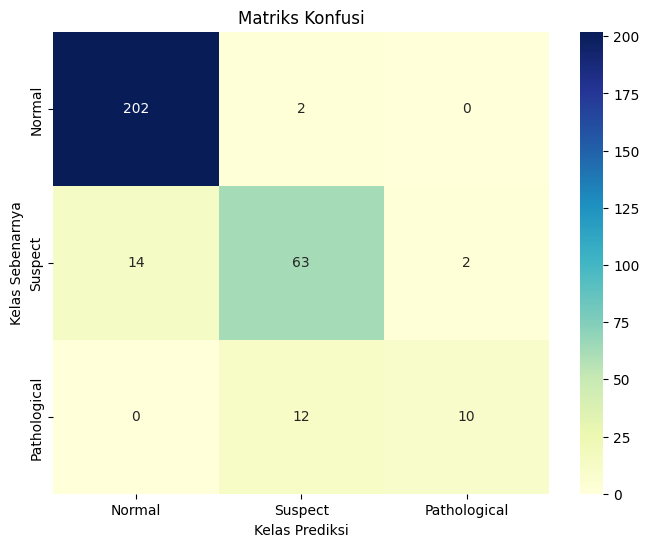

In [ ]:
# Membuat matriks konfusi
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix, "\n")

# Visualisasi matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=["Normal", "Suspect", "Pathological"], yticklabels=["Normal", "Suspect", "Pathological"])
plt.title("Matriks Konfusi")
plt.xlabel("Kelas Prediksi")
plt.ylabel("Kelas Sebenarnya")
plt.show()


In [ ]:
# Membuat data dummy sesuai dengan data asli
new_data = pd.DataFrame({
    'baseline value': [120, 120, 90,],
    'accelerations': [0, 2, 1],
    'fetal_movement': [0, 0, 1],
    'uterine_contractions': [0, 1, 0],
    'abnormal_short_term_variability': [0, 1, 0],
    'mean_value_of_short_term_variability': [0, 0.8, 1.5],
    'histogram_width': [64, 3.0, 2.0],
    'histogram_median': [121, 1.5, 2.2],
    'histogram_variance': [73, 0.6, 0.3],
    'Age': [25, 35, 29],
    'SystolicBP': [130, 140, 90],
    'DiastolicBP': [80, 90, 70],
    'BS': [15, 13, 8],
    'BodyTemp': [98, 98, 100],
    'HeartRate': [86, 70, 80]
})

# Melakukan prediksi pada data dummy
new_predictions = rf_classifier.predict(new_data)

# Menampilkan hasil prediksi
print("\nHasil Prediksi Data Dummy:")
for i, prediction in enumerate(new_predictions):
    print(f"Data {i+1}: {prediction}")


Hasil Prediksi Data Dummy:
Data 1: 1
Data 2: 1
Data 3: 1


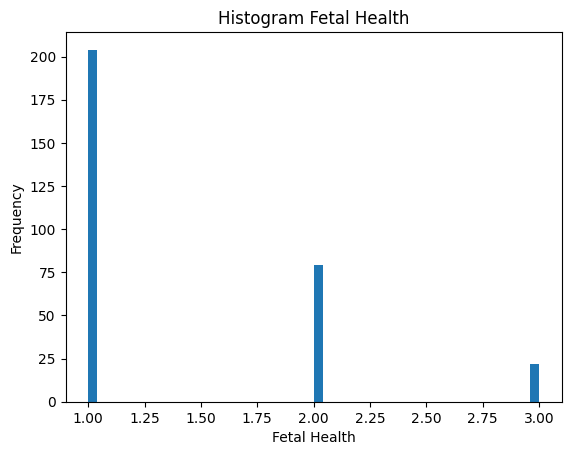

In [ ]:
plt.hist(y_test, bins=50)
plt.title('Histogram Fetal Health')
plt.xlabel('Fetal Health')
plt.ylabel('Frequency')
plt.show()